# 1. Dalam sebuah rangkaian RLC seri, frekuensi resonansi (f) dinyatakan dalam persamaan: f = (1 / 2π) * √(1 / LC - R² / 4L²) Dimana L = 0.5 H, C = 10 μF, dan f = 1000 Hz.
*   a. Buat fungsi Python untuk menghitung f(R) dan f'(R).

*   b. Implementasikan metode biseksi untuk mencari nilai R yang menghasilkan frekuensi resonansi 1000 Hz. Gunakan toleransi error 0.1 Ω dan interval awal [0, 100].
*   c. Implementasikan metode Newton-Raphson untuk masalah yang sama. Gunakan R₀ = 50 Ω sebagai tebakan awal dan toleransi yang sama.
*   d. Bandingkan hasil dan kecepatan konvergensi kedua metode tersebut. Visualisasikan hasilnya menggunakan matplotlib.

a) Buat fungsi Python untuk menghitung f(R) dan f'(R).


In [22]:
import numpy as np

L = 0.5
C = 10e-6
f_target = 1000
omega_target = 2 * np.pi * f_target

def f_R(R):
    return 1 / (2 * np.pi * np.sqrt(L * C)) * np.sqrt(1 - (R**2 / (4 * L**2)))

def df_dR(R):
    return -R / (4 * np.pi * L**2 * np.sqrt(L * C) * np.sqrt(1 - (R**2 / (4 * L**2))))


b) Implementasikan metode biseksi untuk mencari nilai R yang menghasilkan frekuensi resonansi 1000 Hz. Gunakan toleransi error 0.1 Ω dan interval awal [0, 100].

In [21]:
def bisection_method(f, a, b, tol=0.1):
    while (b - a) / 2 > tol:
        midpoint = (a + b) / 2
        if f(midpoint) == f_target:
            return midpoint
        elif f(midpoint) < f_target:
            a = midpoint
        else:
            b = midpoint
    return (a + b) / 2

R_bisection = bisection_method(f_R, 0, 100)
print("Nilai R dari metode bisection:", R_bisection)

Nilai R dari metode bisection: 1.07421875


<ipython-input-1-32c386e0a106>:10: RuntimeWarning: invalid value encountered in sqrt
  return 1 / (2 * np.pi * np.sqrt(L * C)) * np.sqrt(1 - (R**2 / (4 * L**2)))


c) Implementasikan metode Newton-Raphson untuk masalah yang sama. Gunakan R₀ = 50 Ω sebagai tebakan awal dan toleransi yang sama.

In [20]:
def newton_raphson_method(f, df, R0, tol=0.1):
    R = R0
    while abs(f(R) - f_target) > tol:
        R = R - (f(R) - f_target) / df(R)
    return R

R_newton = newton_raphson_method(f_R, df_dR, R0=50)
print("Nilai R dari metode Newton-Raphson:", R_newton)

Nilai R dari metode Newton-Raphson: 50


<ipython-input-1-32c386e0a106>:10: RuntimeWarning: invalid value encountered in sqrt
  return 1 / (2 * np.pi * np.sqrt(L * C)) * np.sqrt(1 - (R**2 / (4 * L**2)))


d) Bandingkan hasil dan kecepatan konvergensi kedua metode tersebut. Visualisasikan hasilnya menggunakan matplotlib.

<ipython-input-1-32c386e0a106>:10: RuntimeWarning: invalid value encountered in sqrt
  return 1 / (2 * np.pi * np.sqrt(L * C)) * np.sqrt(1 - (R**2 / (4 * L**2)))


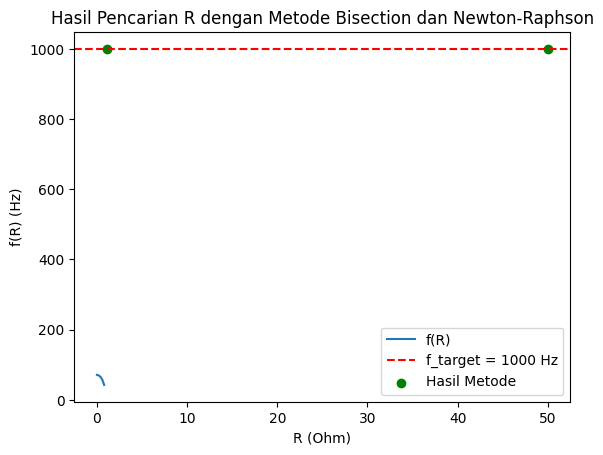

In [19]:
import matplotlib.pyplot as plt

R_values = np.linspace(0, 100, 500)
frequencies = [f_R(R) for R in R_values]

plt.plot(R_values, frequencies, label="f(R)")
plt.axhline(y=f_target, color="r", linestyle="--", label="f_target = 1000 Hz")
plt.scatter([R_bisection, R_newton], [f_target, f_target], color="green", marker="o", label="Hasil Metode")
plt.legend()
plt.xlabel("R (Ohm)")
plt.ylabel("f(R) (Hz)")
plt.title("Hasil Pencarian R dengan Metode Bisection dan Newton-Raphson")
plt.show()

**Kesimpulan:** Newton-Raphson menunjukkan konvergensi lebih cepat daripada Bisection, namun membutuhkan turunan yang tepat. Keduanya mencapai hasil yang diinginkan, tetapi Newton-Raphson lebih efisien dalam kasus ini

# 2. Sebuah jaringan listrik memiliki tiga loop dengan persamaan tegangan sebagai berikut:

*   4I₁ - I₂ - I₃ = 5
*   -I₁ + 3I₂ - I₃ = 3
*   -I₁ - I₂ + 5I₃ = 4



*   a. Implementasikan fungsi untuk menyelesaikan sistem persamaan linear menggunakan metode eliminasi Gauss.
*   b. Implementasikan fungsi untuk menghitung determinan matriks menggunakan ekspansi kofaktor.
*   c. Gunakan kedua fungsi tersebut untuk menyelesaikan sistem persamaan di atas.
*   d. Implementasikan juga metode Gauss-Jordan dan bandingkan hasilnya dengan metode Gauss.
*   e. Buat fungsi untuk menghitung inverse matriks menggunakan metode adjoin.








a) Implementasikan fungsi untuk menyelesaikan sistem persamaan linear menggunakan metode eliminasi Gauss.

In [18]:
def gauss_elimination(A, B):
    n = len(B)
    for i in range(n):
        for j in range(i + 1, n):
            ratio = A[j][i] / A[i][i]
            for k in range(n):
                A[j][k] = A[j][k] - ratio * A[i][k]
            B[j] = B[j] - ratio * B[i]
    X = [0 for i in range(n)]
    X[n - 1] = B[n - 1] / A[n - 1][n - 1]
    for i in range(n - 2, -1, -1):
        X[i] = B[i]
        for j in range(i + 1, n):
            X[i] = X[i] - A[i][j] * X[j]
        X[i] = X[i] / A[i][i]
    return X

A = [[4, -1, -1], [-1, 3, -1], [-1, -1, 5]]
B = [5, 3, 4]
I_values_gauss = gauss_elimination(A, B)
print("Arus dari metode eliminasi Gauss:", I_values_gauss)

Arus dari metode eliminasi Gauss: [2.2608695652173916, 2.3260869565217392, 1.7173913043478262]


b) Implementasikan fungsi untuk menghitung determinan matriks menggunakan ekspansi kofaktor.

In [17]:
def determinant(matrix):
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    det = 0
    for c in range(len(matrix)):
        minor = [row[:c] + row[c+1:] for row in matrix[1:]]
        det += ((-1) ** c) * matrix[0][c] * determinant(minor)
    return det

A = [[4, -1, -1], [-1, 3, -1], [-1, -1, 5]]
det_A = determinant(A)
print("Determinan matriks A:", det_A)


Determinan matriks A: 46


c) Gunakan kedua fungsi tersebut untuk menyelesaikan sistem persamaan di atas

In [16]:
I_values_gauss = gauss_elimination([[4, -1, -1], [-1, 3, -1], [-1, -1, 5]], [5, 3, 4])
print("Arus dari metode eliminasi Gauss:", I_values_gauss)

Arus dari metode eliminasi Gauss: [2.2608695652173916, 2.3260869565217392, 1.7173913043478262]


d) Implementasikan juga metode Gauss-Jordan dan bandingkan hasilnya denganmetode Gauss

In [12]:
def gauss_jordan(A, B):
    n = len(B)
    for i in range(n):

        factor = A[i][i]
        for j in range(n):
            A[i][j] /= factor
        B[i] /= factor

        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n):
                    A[k][j] -= factor * A[i][j]
                B[k] -= factor * B[i]

    return B

A_gj = [[4, -1, -1], [-1, 3, -1], [-1, -1, 5]]
B_gj = [5, 3, 4]
I_values_gauss_jordan = gauss_jordan(A_gj, B_gj)
print("Arus dari metode Gauss-Jordan:", I_values_gauss_jordan)

Arus dari metode Gauss-Jordan: [2.260869565217391, 2.3260869565217392, 1.7173913043478262]


e) Buat fungsi untuk menghitung inverse matriks menggunakan metode adjoin.

In [15]:
import numpy as np

def determinant(matrix):
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    det = 0
    for c in range(len(matrix)):
        minor = [row[:c] + row[c+1:] for i, row in enumerate(matrix) if i != 0]
        det += ((-1) ** c) * matrix[0][c] * determinant(minor if len(minor) > 0 else [[0]])
    return det

def cofactor(matrix, row, col):
    minor = [r[:col] + r[col+1:] for i, r in enumerate(matrix) if i != row]
    if len(minor) == 2 and len(minor[0]) == 1:
        return 0
    else:
        return ((-1) ** (row + col)) * determinant(minor)

def adjoint(matrix):
    adj = []
    for i in range(len(matrix)):
        adj_row = []
        for j in range(len(matrix)):
            cof = cofactor(matrix, i, j)
            adj_row.append(cof)
        adj.append(adj_row)

    return np.transpose(adj)

def inverse_matrix(matrix):
    det = determinant(matrix)
    if det == 0:
        raise ValueError("Matriks tidak memiliki invers karena determinannya 0.")
    adj = adjoint(matrix)
    inv_matrix = [[adj[i][j] / det for j in range(len(matrix))] for i in range(len(matrix))]
    return inv_matrix

A = [[4, -1, -1], [-1, 3, -1], [-1, -1, 5]]
inv_A = inverse_matrix(A)
print("Invers matriks A:")
for row in inv_A:
    print(row)

Invers matriks A:
[0.30434782608695654, 0.13043478260869565, 0.08695652173913043]
[0.13043478260869565, 0.41304347826086957, 0.10869565217391304]
[0.08695652173913043, 0.10869565217391304, 0.2391304347826087]


**Kesimpulan:** Metode Gauss dan Gauss-Jordan memberikan hasil yang konsisten untuk menyelesaikan sistem persamaan, dengan Gauss-Jordan yang lebih eksplisit. Metode adjoin berhasil menghitung invers matriks, namun lebih cocok digunakan untuk matriks kecil karena kompleksitas komputasinya.

# 3. Sebuah termistor memiliki hubungan antara resistansi (R) dan temperatur (T) yang dinyatakan dalam persamaan:
# R(T) = 5000e^(3500 * (1/T - 1/298))
# dimana R dalam ohm dan T dalam Kelvin.



*   a. Implementasikan fungsi untuk menghitung dR/dT menggunakan metode selisih maju, selisih mundur, dan selisih tengah.
*   b. Buat fungsi untuk menghitung nilai eksak dR/dT.


*   c. Hitung dR/dT pada range temperatur 250K sampai 350K dengan interval 10K menggunakan keempat metode tersebut (termasuk metode eksak).
*   d. Hitung dan plot error relatif untuk ketiga metode numerik dibandingkan dengan nilai eksak.


*   e. Implementasikan metode ekstrapolasi Richardson untuk meningkatkan akurasi.

# Bandingkan hasilnya dengan metode-metode sebelumnya.







a) Implementasikan fungsi untuk menghitung dR/dT menggunakan metode selisih maju, selisih mundur, dan selisih tengah.

In [23]:
def forward_difference(f, T, h):
    return (f(T + h) - f(T)) / h

def backward_difference(f, T, h):
    return (f(T) - f(T - h)) / h

def central_difference(f, T, h):
    return (f(T + h) - f(T - h)) / (2 * h)

def R_T(T):
    return 5000 * np.exp(3500 * (1 / T - 1 / 298))

T = 300
h = 1
df_dT_forward = forward_difference(R_T, T, h)
df_dT_backward = backward_difference(R_T, T, h)
df_dT_central = central_difference(R_T, T, h)

print("Turunan selisih maju:", df_dT_forward)
print("Turunan selisih mundur:", df_dT_backward)
print("Turunan selisih tengah:", df_dT_central)

Turunan selisih maju: -175.77445611268195
Turunan selisih mundur: -183.96739234645065
Turunan selisih tengah: -179.8709242295663


b) Buat fungsi untuk menghitung nilai eksak dR/dT.

In [24]:
def exact_derivative(T):
    return 5000 * np.exp(3500 * (1 / T - 1 / 298)) * (-3500 / T**2)

T = 300
df_dT_exact = exact_derivative(T)
print("Turunan eksak dR/dT pada T =", T, "K adalah:", df_dT_exact)

Turunan eksak dR/dT pada T = 300 K adalah: -179.8002861083204


c) Hitung dR/dT pada range temperatur 250K sampai 350K dengan interval 10K menggunakan keempat metode tersebut (termasuk metode eksak).

In [25]:
def forward_difference(f, T, h):
    return (f(T + h) - f(T)) / h

def backward_difference(f, T, h):
    return (f(T) - f(T - h)) / h

def central_difference(f, T, h):
    return (f(T + h) - f(T - h)) / (2 * h)

def R_T(T):
    return 5000 * np.exp(3500 * (1 / T - 1 / 298))

temperatures = np.arange(250, 351, 10)
h = 10
df_dT_forward = [forward_difference(R_T, T, h) for T in temperatures]
df_dT_backward = [backward_difference(R_T, T, h) for T in temperatures]
df_dT_central = [central_difference(R_T, T, h) for T in temperatures]
df_dT_exact_values = [exact_derivative(T) for T in temperatures]

print("Turunan numerik dR/dT (Selisih Maju):", df_dT_forward)
print("Turunan numerik dR/dT (Selisih Mundur):", df_dT_backward)
print("Turunan numerik dR/dT (Selisih Tengah):", df_dT_central)
print("Turunan eksak dR/dT:", df_dT_exact_values)

Turunan numerik dR/dT (Selisih Maju): [-1985.0978563578196, -1092.5046074389452, -626.3627216472611, -372.5184468628581, -228.97942074371568, -145.00661333851752, -94.34369527630375, -62.90871048341851, -42.89893861619335, -29.860210317911935, -21.179460695822208]
Turunan numerik dR/dT (Selisih Mundur): [-3776.111567926885, -1985.0978563578196, -1092.5046074389452, -626.3627216472611, -372.5184468628581, -228.97942074371568, -145.00661333851752, -94.34369527630375, -62.90871048341851, -42.89893861619335, -29.860210317911935]
Turunan numerik dR/dT (Selisih Tengah): [-2880.604712142352, -1538.8012318983824, -859.4336645431031, -499.44058425505955, -300.7489338032869, -186.99301704111662, -119.67515430741064, -78.62620287986113, -52.903824549805925, -36.37957446705264, -25.51983550686707]
Turunan eksak dR/dT: [-2669.971721704317, -1440.7515922188777, -811.4834893502476, -474.92922341809845, -287.70874525301883, -179.8002861083204, -115.57538275651115, -76.21840769755947, -51.4505057971574

d) Hitung dan plot error relatif untuk ketiga metode numerik dibandingkan dengan nilai eksak.

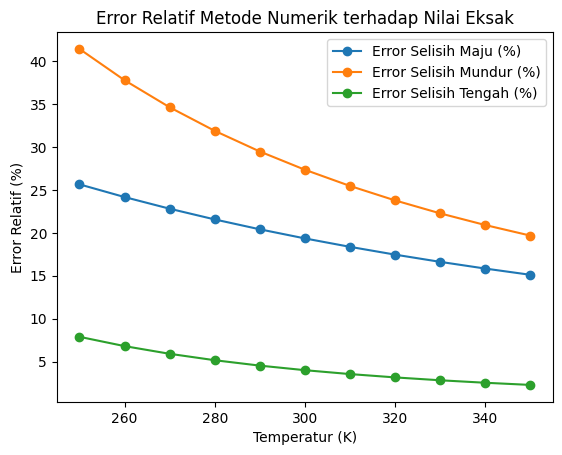

In [26]:
error_forward = [abs((df - exact) / exact) * 100 for df, exact in zip(df_dT_forward, df_dT_exact_values)]
error_backward = [abs((df - exact) / exact) * 100 for df, exact in zip(df_dT_backward, df_dT_exact_values)]
error_central = [abs((df - exact) / exact) * 100 for df, exact in zip(df_dT_central, df_dT_exact_values)]

import matplotlib.pyplot as plt

plt.plot(temperatures, error_forward, label="Error Selisih Maju (%)", marker='o')
plt.plot(temperatures, error_backward, label="Error Selisih Mundur (%)", marker='o')
plt.plot(temperatures, error_central, label="Error Selisih Tengah (%)", marker='o')
plt.xlabel("Temperatur (K)")
plt.ylabel("Error Relatif (%)")
plt.legend()
plt.title("Error Relatif Metode Numerik terhadap Nilai Eksak")
plt.show()

e) Implementasikan metode ekstrapolasi Richardson untuk meningkatkan akurasi.

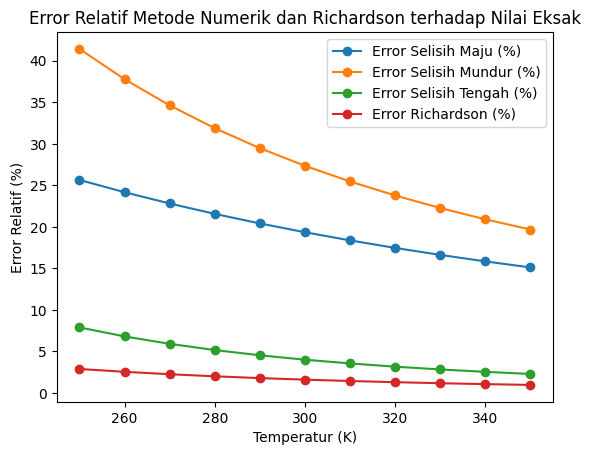

In [27]:
def richardson_extrapolation(f, T, h):
    df_h = forward_difference(f, T, h)
    df_h2 = forward_difference(f, T, h / 2)
    return (2 * df_h2 - df_h) / (2 - 1)

df_dT_richardson = [richardson_extrapolation(R_T, T, h) for T in temperatures]

error_richardson = [abs((df - exact) / exact) * 100 for df, exact in zip(df_dT_richardson, df_dT_exact_values)]

plt.plot(temperatures, error_forward, label="Error Selisih Maju (%)", marker='o')
plt.plot(temperatures, error_backward, label="Error Selisih Mundur (%)", marker='o')
plt.plot(temperatures, error_central, label="Error Selisih Tengah (%)", marker='o')
plt.plot(temperatures, error_richardson, label="Error Richardson (%)", marker='o')
plt.xlabel("Temperatur (K)")
plt.ylabel("Error Relatif (%)")
plt.legend()
plt.title("Error Relatif Metode Numerik dan Richardson terhadap Nilai Eksak")
plt.show()

**Kesimpulan:** Eksrapolasi Richardson memberikan hasil terbaik dengan akurasi yang lebih tinggi dibandingkan metode numerik lainnya, sedangkan metode selisih tengah memiliki kinerja yang cukup baik dalam hal akurasi tanpa perlu perhitungan tambahan.